# Data Exploration of processed Data
Same notebook as 02.1, only with Betrag * Phasenwinkel as input data
  
### 01 Handle Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [7]:
df = pd.read_csv("../data/processed/combined_2022-09-15_14-21-11.csv")

df.head()

5000.000000  5740.768000  6591.284000  7567.806000  8689.004000  \
0    17.705285    21.767452    27.432624    34.524095    44.036978   
1     8.869740    12.144041    14.844122    19.650586    25.574712   
2     7.773045    10.068876    11.879365    14.668393    18.436246   
3    17.426878    22.709851    28.709356    36.701701    47.363121   
4     9.263381    12.133249    14.730286    19.410241    24.977964   

   9976.312000  11454.338000  13151.340000  15099.759000  17336.843000  ...  \
0    56.051537     69.759145     88.881988    112.632072    141.702428  ...   
1    34.100543     43.389027     56.505727     72.746936     92.062202  ...   
2    23.184037     27.792926     34.985413     43.835100     54.559996  ...   
3    61.916200     78.862712    100.713263    129.511014    164.456754  ...   
4    32.789659     41.859026     53.954512     69.805836     88.137173  ...   

   2505936.168000  2877199.687000  3303467.240000  3792887.875000  \
0      -36.189628      -26.062869      -18.976547      -14.289738   
1      -22.227013      -15.865648      -11.302803       -8.362544   
2      -23.882421      -17.241228      -12.525843       -9.315809   
3      -37.445587      -26.496923      -18.921531      -13.538954   
4      -22.237764      -15.848157      -11.530705       -8.151251   

   4354817.950000  5000000.000000  Reihe_Sphaeroid  Nr_Reihe_Sphaeroid  \
0      -10.915778       -8.592447                R              10.csv   
1       -6.307066       -4.940490                R               2.csv   
2       -7.089933       -5.469639                R               8.csv   
3       -9.727938       -7.171493                R               6.csv   
4       -5.979623       -4.521951                R               3.csv   

   Zellinie   Exp  
0       T24  Exp1  
1       T24  Exp1  
2       T24  Exp1  
3       T24  Exp1  
4       T24  Exp1  

[5 rows x 55 columns]

In [8]:
# for convenient calculation we split the data in features and targets
df_features = df.iloc[:, 1:-4]
df_features.columns = df_features.columns.astype(float)
df_target = df["Zellinie"]
targets = df_target.unique()
print(targets)



['T24' 'MDA' 'T30']


### 02 EDA of processed Data
The goal is to understand how the data is distrubuted an how the impedance differs between different cell lines and experiments.
- Firstly, we take a look at some descriptive statistics
- Then, we investigate the correlation within a cell line of impedance 

In [9]:
stats_df = df.describe()

stats_df.columns = stats_df.columns.astype(float)
stats_df

5000.000     5740.768     6591.284     7567.806     8689.004     \
count   116.000000   116.000000   116.000000   116.000000   116.000000   
mean      3.786509     4.973914     6.657938     8.913910    11.848487   
std       7.073040     8.906300    11.571702    14.761535    18.923818   
min      -3.079257    -3.585452    -3.509025    -3.743465    -3.788971   
25%       0.115730     0.152578     0.478983     0.908192     1.213199   
50%       0.664426     0.908652     1.442807     1.853580     3.336775   
75%       4.912392     5.706721     7.089247     9.239341    11.707431   
max      39.168555    49.097071    63.285814    79.926656   102.207377   

       9976.312     11454.338    13151.340    15099.759    17336.843    ...  \
count   116.000000   116.000000   116.000000   116.000000   116.000000  ...   
mean     15.641132    20.646600    27.217700    35.678569    46.143826  ...   
std      24.540265    31.466420    40.435403    51.372449    64.663543  ...   
min      -3.798473    -3.851904    -3.564889    -3.286975    -2.242197  ...   
25%       1.848211     2.466555     3.188659     3.946509     4.971415  ...   
50%       4.919895     7.833556    10.497738    15.079781    21.084985  ...   
75%      14.689869    19.331794    25.472499    34.537819    45.489247  ...   
max     129.010042   164.288774   209.856612   263.759111   328.967603  ...   

       1442015.752  1655655.607  1900946.982  2182579.161  2505936.168  \
count   116.000000   116.000000   116.000000   116.000000   116.000000   
mean   -140.963022  -110.246051   -82.932134   -60.445263   -42.695725   
std      92.676265    72.176355    53.686553    38.376000    26.442917   
min    -343.128119  -262.181320  -197.906750  -145.515001  -103.700934   
25%    -219.418860  -171.048292  -129.490391   -93.707000   -64.846256   
50%    -138.123275  -106.903807   -83.281521   -62.329514   -44.628877   
75%     -54.028797   -43.191906   -33.097071   -25.036355   -18.131640   
max      -8.096644    -7.104761    -6.293416    -5.366353    -4.517990   

       2877199.687  3303467.240  3792887.875  4354817.950  5000000.000  
count   116.000000   116.000000   116.000000   116.000000   116.000000  
mean    -29.680783   -20.450508   -14.194216    -9.988013    -7.275189  
std      17.774957    11.810283     7.877120     5.398061     3.921694  
min     -71.679098   -49.226675   -33.864844   -23.736915   -17.389170  
25%     -45.411506   -30.711424   -21.222122   -14.842144   -10.915002  
50%     -30.175949   -20.014160   -14.291704    -9.800499    -7.149380  
75%     -13.398540    -9.251132    -6.395970    -4.872076    -3.673916  
max      -3.822254    -3.192791    -2.301308    -1.171058    -0.607886  

[8 rows x 51 columns]

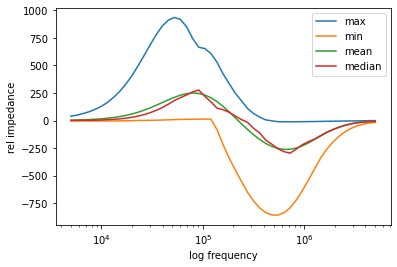

In [10]:
plt.plot(stats_df.T['max'], label='max')
plt.plot(stats_df.T['min'], label='min')
plt.plot(stats_df.T['mean'], label='mean')
plt.plot(stats_df.T['50%'], label='median')
plt.xscale('log')
plt.xlabel('log frequency')
plt.ylabel('rel impedance')
plt.legend()

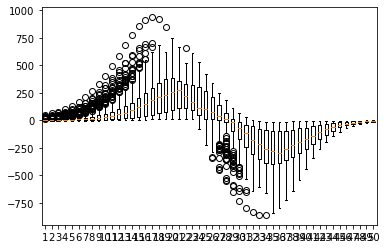

In [11]:
plt.boxplot(df_features)
plt.show()

### First Impression
The data looks plausible and from a first look it doesn't seem to be noisy or with extreme outlayers.
One can see a clear relation between the frequency and the relative impedance (even across all cell lines and experiments). Low freqencies lead to low impedance and high frequencies also lead to low impedance, whereas medium frequencies lead to high impedance

Next we'll look at the same plots for each celline

Text(0.5, 1.0, 'Mean Rel Impedance')

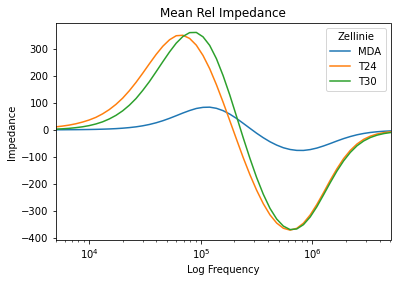

In [13]:

df_mean = df.groupby("Zellinie").mean()

df_mean.columns = df_mean.columns.astype(float)
ax=df_mean.T.plot(xlim=(df_mean.columns.min(), df_mean.columns.max()), logx=True, xlabel="Log Frequency", ylabel="Impedance")
ax.set_title('Mean Rel Impedance')

/tmp/ipykernel_339150/1631808473.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  df_max = df.groupby("Zellinie").max()


Text(0.5, 1.0, 'Max Rel. Impedance')

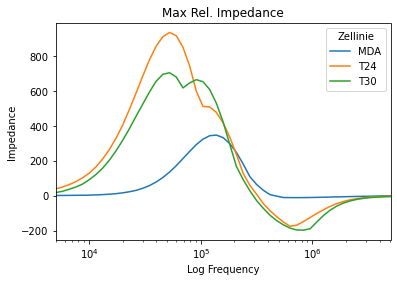

In [15]:

df_max = df.groupby("Zellinie").max()
del df_max['Nr_Reihe_Sphaeroid']
del df_max['Exp']
df_max.columns = df_max.columns.astype(float)
ax = df_max.T.plot(xlim=(df_max.columns.min(), df_max.columns.max()), logx=True, xlabel="Log Frequency", ylabel="Impedance")
ax.set_title('Max Rel. Impedance')

/tmp/ipykernel_339150/502040626.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  df_min = df.groupby("Zellinie").min()


Text(0.5, 1.0, 'Min Rel. Impedance')

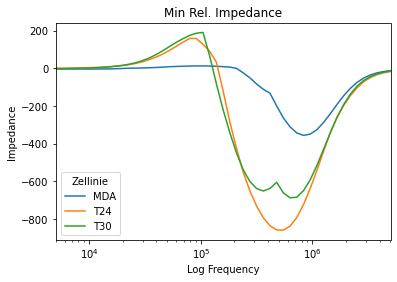

In [16]:
df_min = df.groupby("Zellinie").min()
del df_min['Nr_Reihe_Sphaeroid']
del df_min['Exp']
df_min.columns = df_min.columns.astype(float)
ax = df_min.T.plot(xlim=(df_min.columns.min(), df_min.columns.max()), logx=True, xlabel="Log Frequency", ylabel="Impedance")
ax.set_title('Min Rel. Impedance')

T24
MDA
T30


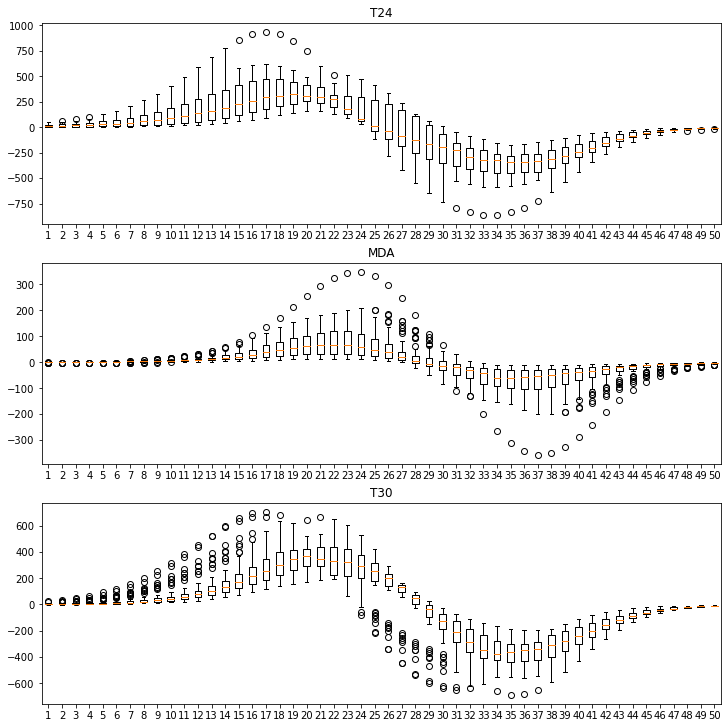

In [17]:
fig, ax = plt.subplots(3,1, figsize=(10,10), constrained_layout=True)
for i, target in enumerate(targets):
    print(target)
    ax[i].boxplot(df_features[df['Zellinie']==target])
    ax[i].set_title(target)

The figures for each cellline show that there is a difference in the frequency-impedance relation between the T celllines and the MDA cellline. However the differences between the T30 and T24 cellline are only marginal.

### Correlation within Celllines
To investigate how the relationship between frequency and relative impedance differs between different experiments inside one cell line, we look at the correlation between the impedance values relative to the frequencies

Text(0.5, 1.0, 'MDA Cellline')

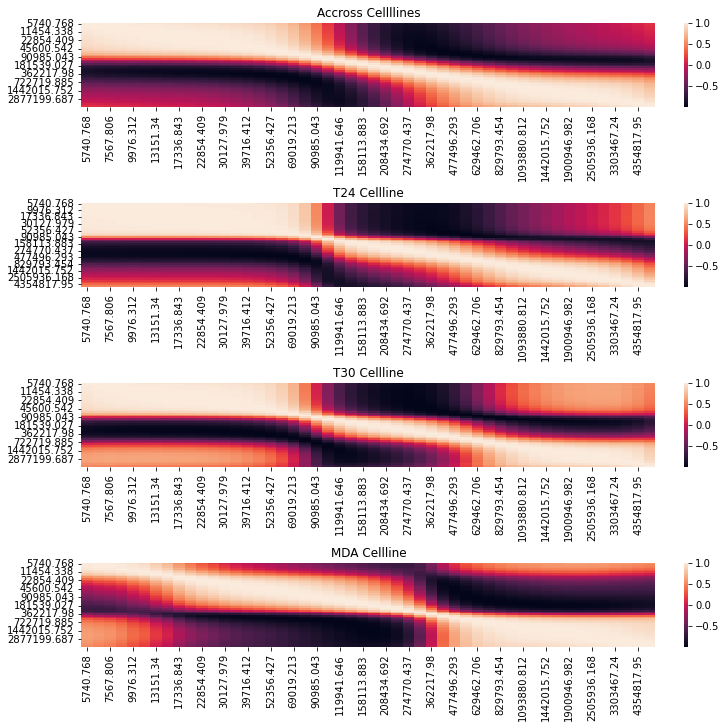

In [18]:
fig,ax = plt.subplots(4,1, figsize=(10,10), constrained_layout=True)
sns.heatmap(df_features.corr(), ax=ax[0])
ax[0].set_title('Accross Cellllines')
sns.heatmap(df_features[df['Zellinie'] == "T24"].corr(), ax=ax[1])
ax[1].set_title('T24 Cellline')
sns.heatmap(df_features[df['Zellinie'] == 'T30'].corr(), ax=ax[2])
ax[2].set_title('T30 Cellline')
sns.heatmap(df_features[df['Zellinie'] == 'MDA'].corr(),ax=ax[3])
ax[3].set_title('MDA Cellline')

### Conclusion Heatmaps
The heatmaps shows that the relation between frequencies and rel impedance is correlated within all experiments of a cellline. Where the same frequencies have similar rel. impedances and different frequencies are inversely correlated.

### 03 Plot Finger Print of Cellline
According to our domain expert each cellline has a impedance fingerprint. The fingerprint we use here is the mean impedance over all experiments of a certain cellline and its corresponding frequency.

Experimentally we try to visualize a fingerprint over different experiments

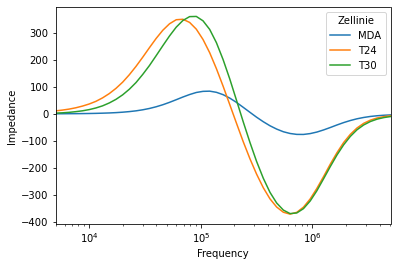

In [19]:
ax = df_mean.T.plot(xlim=(df_mean.columns.min(), df_mean.columns.max()), logx=True, xlabel="Frequency", ylabel="Impedance")

In [20]:
df_mean

5000.000     5740.768     6591.284     7567.806     8689.004     \
Zellinie                                                                    
MDA          0.048710     0.152440     0.386003     0.493525     0.771490   
T24         10.830945    13.687010    17.361019    22.224010    28.530657   
T30          2.551382     3.635482     5.347230     7.876483    11.047776   

          9976.312     11454.338    13151.340    15099.759    17336.843    \
Zellinie                                                                    
MDA          1.100569     1.581586     2.270878     3.107884     4.299755   
T24         36.240856    46.024636    58.927113    74.763880    94.074096   
T30         15.475493    21.541816    29.410523    40.119692    53.406164   

          ...  1442015.752  1655655.607  1900946.982  2182579.161  \
Zellinie  ...                                                       
MDA       ...   -50.878180   -41.434492   -32.607176   -24.911384   
T24       ...  -186.759441  -144.250558  -106.430608   -76.106921   
T30       ...  -195.728267  -152.744922  -114.947906   -83.685561   

          2505936.168  2877199.687  3303467.240  3792887.875  4354817.950  \
Zellinie                                                                    
MDA        -18.492965   -13.586806    -9.869568    -7.285587    -5.420187   
T24        -52.501619   -35.251460   -23.429648   -15.576207   -10.469532   
T30        -59.112522   -41.245027   -28.519264   -19.846550   -14.019903   

          5000000.000  
Zellinie               
MDA         -4.166399  
T24         -7.292106  
T30        -10.231136  

[3 rows x 51 columns]

In [21]:
df_mean.columns.min()

5000.0

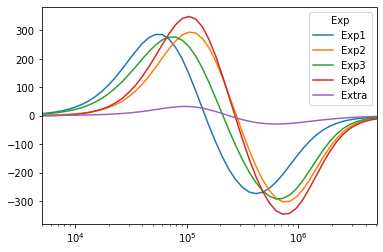

In [23]:
df_mean = df.groupby("Exp").mean()
df_mean.columns = df_mean.columns.astype(float)
ax = df_mean.T.plot(xlim=(df_mean.columns.min(), df_mean.columns.max()), logx=True)

## PCA to Cluster Celllines
A very easy an primitive way to cluster the data is just do get the 1. and 2. PC and color the datapoints according to the celline

In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(df_features)
pca = PCA(n_components=2)
pca_comp = pca.fit(x)

pca_df = pd.DataFrame(data=pca_comp.transform(x), columns=["PC1", "PC2"])



In [28]:
targets = df_target.unique()
colors = ["r", "g", "b"]

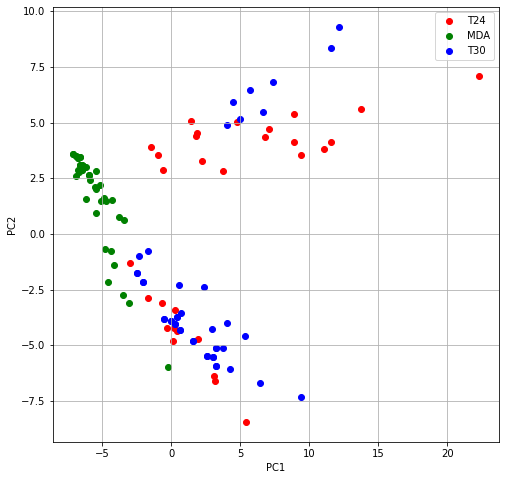

In [29]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
for target, colors in zip(targets, colors):
    ind_to_keep = df_target == target
    ax.scatter(pca_df.loc[ind_to_keep, "PC1"], pca_df.loc[ind_to_keep, "PC2"], c=colors)
ax.legend(targets)
ax.grid()
plt.show()

### TSNE


In [39]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(x)
X_embedded.shape

(116, 2)

In [40]:
tsne_df = pd.DataFrame(X_embedded, columns=["TSNE1", "TSNE2"])
targets = df_target.unique()
colors = ["r", "g", "b"]

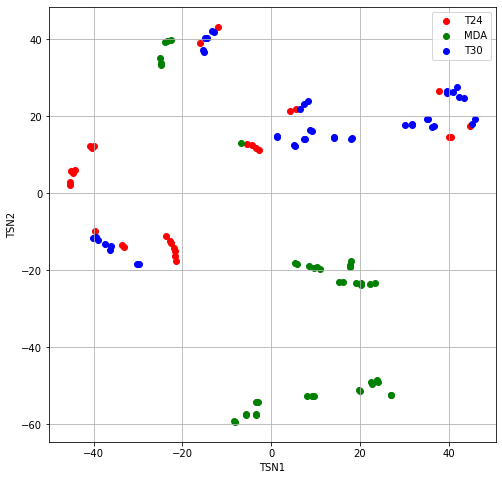

In [41]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("TSN1")
ax.set_ylabel("TSN2")
for target, color in zip(targets, colors):

    ind_to_keep = df_target == target
    ax.scatter(tsne_df.loc[ind_to_keep, "TSNE1"], tsne_df.loc[ind_to_keep, "TSNE2"], c=color)
ax.legend(targets)
ax.grid()
plt.show()

In [33]:
!pip install fuzzy-c-means

Defaulting to user installation because normal site-packages is not writeable


### Clustering as in Paper
The author of the paper first used PCA (3D) to reduce dimensionality and then used fuzzy-c-means to cluster the data. We quickly try to reproduce this.
Edit: here we need to check what was done by the authors exactly, not clear in paper

In [34]:
from fcmeans import FCM

# first reduce dimension
x = StandardScaler().fit_transform(df_features)
pca = PCA(n_components=3)
X = pca.fit_transform(x)


In [35]:
# second use fuzzy c-means
fcm = FCM(n_clusters=3)
fcm.fit(X)


Text(0.5, 1.0, 'Predicted Clustering')

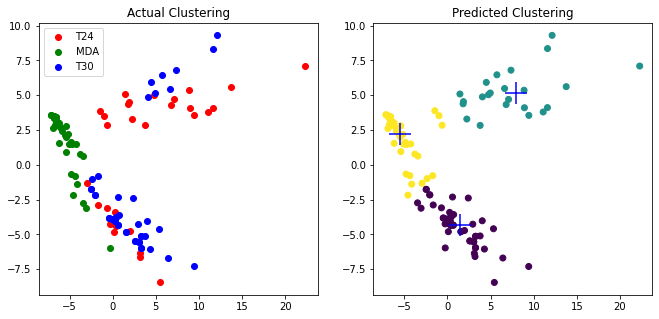

In [38]:
# outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(X)

# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
#axes[0].scatter(X[:,0], X[:,1], alpha=1)
for target, color in zip(targets, colors):
    ind_to_keep = df_target == target
    axes[0].scatter(pca_df.loc[ind_to_keep, "PC1"], pca_df.loc[ind_to_keep, "PC2"], c=color)
axes[1].scatter(X[:,0], X[:,1], c=fcm_labels)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='b')
axes[0].legend(targets)
axes[0].set_title("Actual Clustering")
axes[1].set_title("Predicted Clustering")